In [72]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


%matplotlib inline

In [123]:
df = pd.read_csv('moscow_flats.csv')
df = df[df['price'] < 15e6]

In [124]:
df.head()

,Id,price,floor,floorTotal,metroDistance,area,rooms,distanceToCentre
3,3,5333160,15,17,136,54.4,2,26.809075
4,4,3789790,17,17,120,39.1,1,26.809075
8,8,1250000,12,17,320,25.7,1,49.780351
10,11,4000000,8,9,480,67.0,3,101.706981
17,18,2800000,8,14,160,39.6,1,31.498761


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1431.0,1.511157e+03,7.680160e+02,3.000000e+00,8.780000e+02,1.658000e+03,2.203500e+03,2.697000e+03
price,1431.0,4.755582e+06,2.792511e+06,1.100000e+06,3.086055e+06,3.750000e+06,5.070560e+06,1.490000e+07
floor,1431.0,6.997205e+00,5.292691e+00,1.000000e+00,3.000000e+00,6.000000e+00,1.000000e+01,3.100000e+01
floorTotal,1431.0,1.408036e+01,6.824768e+00,2.000000e+00,9.000000e+00,1.600000e+01,1.700000e+01,7.100000e+01
metroDistance,1431.0,1.448658e+02,1.043101e+02,1.000000e+00,8.000000e+01,1.360000e+02,1.920000e+02,7.200000e+02
area,1431.0,4.593899e+01,1.373302e+01,1.280000e+01,3.670000e+01,4.260000e+01,5.340000e+01,1.170000e+02
rooms,1431.0,1.446541e+00,6.475669e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
distanceToCentre,1431.0,2.521378e+01,1.215277e+01,1.758826e+00,1.932361e+01,2.412194e+01,3.089777e+01,1.100322e+02


In [126]:
df.isnull().any()

Id                  False
price               False
floor               False
floorTotal          False
metroDistance       False
area                False
rooms               False
distanceToCentre    False
dtype: bool

In [127]:
#df.dropna()

In [128]:
target = df['price']
del(df['price'])

In [129]:
df.columns

Index(['Id', 'floor', 'floorTotal', 'metroDistance', 'area', 'rooms',
       'distanceToCentre'],
      dtype='object')

In [130]:
df_train, df_test, target_train, target_test = train_test_split(df,target)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
model = LinearRegression()
model.fit(df_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
predicted_price = model.predict(df_test)

In [134]:
mean_absolute_error(predicted_price, target_test)

1178871.1017734837

In [135]:
mean_squared_error(predicted_price, target_test)/10e14

0.002724260847278022

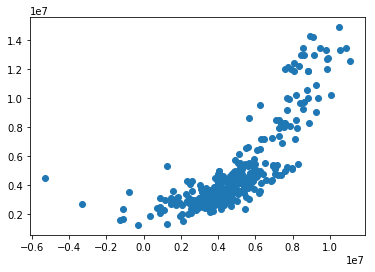

In [136]:
plt.scatter(predicted_price, target_test)


In [137]:
predicted_price.shape

(358,)

In [138]:
target_test.shape

(358,)

In [142]:
model.intercept_

3162023.481982977

In [141]:
list(zip(model.coef_, df.columns))

[(-243.4735197804806, 'Id'),
 (37940.19743864349, 'floor'),
 (860.7516880445864, 'floorTotal'),
 (-7426.748335140207, 'metroDistance'),
 (105616.26246701054, 'area'),
 (85998.04076173723, 'rooms'),
 (-87422.0066022175, 'distanceToCentre')]

In [97]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(df_train, target_train)
predicted_price = model.predict(df_test)

In [98]:
mean_absolute_error(predicted_price, target_test)

12776595.778586626

In [99]:
mean_squared_error(predicted_price, target_test)/10e14

1.1092874740255882

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
model = RandomForestRegressor()
model.fit(df_train, target_train)
predicted_price = model.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [145]:
mean_absolute_error(predicted_price, target_test)

571549.707821229

In [146]:
mean_squared_error(predicted_price, target_test)/10e14

0.0007836637753734153

In [147]:
list(zip(model.feature_importances_, df.columns))

[(0.02383862145198355, 'Id'),
 (0.013054229072877491, 'floor'),
 (0.011948862591914012, 'floorTotal'),
 (0.02655581996606174, 'metroDistance'),
 (0.26623368696342875, 'area'),
 (0.004006442540568452, 'rooms'),
 (0.6543623374131661, 'distanceToCentre')]

In [63]:
x = [i for i in range(10)]

In [64]:
y = [i**4 for i in range(10)]

In [60]:
x,y

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 1, 16, 81, 256, 625, 1296, 2401, 4096, 6561])